This is a notebook for analysing marketing campaigns using Python

In this notebook, we would look at
- exploratory analysis using Pandas
- 

In [3]:
import pandas as pd

# Load the csv making sure data columns are assigned properly 

marketing = pd.read_csv("marketing.csv", parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [20]:
# How many columns and rows are there in the dataframe ?
marketing.shape

(10037, 12)

In [5]:
# What are the names of the columns ?
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [21]:
# What are the different values in marketing_channel columns ?
marketing.marketing_channel.unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [22]:
# What are the different values in variant columns ?
marketing.variant.unique()

array(['personalization', 'control'], dtype=object)

In [23]:
# What are the different values in converted columns ?
marketing.converted.unique()

array([True, False, nan], dtype=object)

In [36]:
# what are the datatypes of columns ?
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [15]:
# is_retained should be a boolean so lets convert it to a boolean
marketing['is_retained'] = marketing['is_retained'].astype("bool")

# Check the data type of is_retained to make sure it has been changed
print(marketing['is_retained'].dtype)

bool


In [30]:
# What is the date range in this data?

# lets look at the minimum date

print(min(marketing.date_served))

2018-01-01 00:00:00


In [31]:
# now lets look at the maximum date

print(max(marketing.date_served))

2018-01-31 00:00:00


In [32]:
# Print the statistics of all columns
print(marketing.describe())

           user_id          date_served marketing_channel  variant converted  \
count        10037                10021             10022    10037     10022   
unique        7309                   31                 5        2         2   
top     a100000882  2018-01-15 00:00:00         House Ads  control     False   
freq            12                  789              4733     5091      8946   
first          NaN  2018-01-01 00:00:00               NaN      NaN       NaN   
last           NaN  2018-01-31 00:00:00               NaN      NaN       NaN   

       language_displayed language_preferred    age_group  \
count               10037              10037        10037   
unique                  4                  4            7   
top               English            English  19-24 years   
freq                 9793               9275         1682   
first                 NaN                NaN          NaN   
last                  NaN                NaN          NaN   

           

C:\Users\Rehan\AppData\Local\Temp\ipykernel_25752\786579053.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(marketing.describe())
C:\Users\Rehan\AppData\Local\Temp\ipykernel_25752\786579053.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(marketing.describe())
C:\Users\Rehan\AppData\Local\Temp\ipykernel_25752\786579053.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
 

In [28]:
# How many values are in the column of marketing_channel ?

marketing.subscribing_channel.value_counts()

Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64

In [33]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB
None


In [35]:
# Now, lets see what values are there in the column of subscribing channel

marketing.subscribing_channel.value_counts()

Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64

In [36]:
# Lets make a new column and change the names of channels to numbers : This can be done by Mapping

channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)


In [38]:
# Double checking that the columns 'subscribing_channel' and 'channel_code' are comparable
marketing.channel_code.value_counts()

2.0    600
3.0    445
1.0    354
4.0    290
5.0    167
Name: channel_code, dtype: int64

In [39]:
# Now, lets add a column which would tell us if the ad was displayed in the language preferred by the customer 

import numpy as np

# Add the new column is_correct_lang which is checking here if value in column language preferred is equal to value in column of language displayed

marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

marketing.is_correct_lang.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object

In [40]:
# Add a Day of the week "DOW" column which would tell us the day of week

marketing['dow'] = marketing['date_subscribed'].dt.dayofweek    


In [41]:
marketing.dow.value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: dow, dtype: int64

In [42]:
# We want to know, how many unique users are there on daily basis ?

# We have to group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


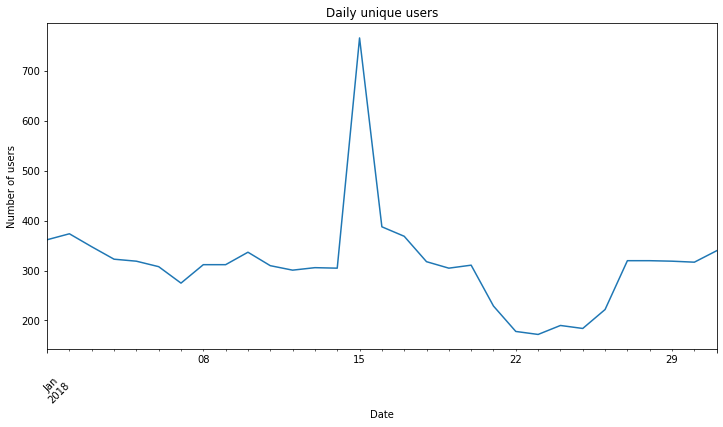

In [53]:
# It is always better to see result on a graph rather than in a table, 
# so we would plot the graph

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Lets now Plot the daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily unique users')
plt.ylabel('Number of users')
plt.xlabel('Date')


# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

What is Conversion rate ?

Conversion rate can be defined as the percentage of users who saw the marketing ads and then became subscribers

The formula would be

Conversion rate = No of people who convert / total number of people who we market to

In [55]:
# Calculate the number of people we marketed to
total = marketing["user_id"].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the conversion rate

print("subscribers : ", subscribers)
print("total : ", total)

conversion_rate = subscribers / total
print("conversion rate : ", round(conversion_rate*100, 2), "%")

subscribers :  1015
total :  7309
conversion rate :  13.89 %


What is retention rate ?

retention rate is the number of remaining subscribers from the users who converted to your product after a certain period of time.

subscribers can subscribe to the service first, and then cancel the subscription once the trial is over. the users who remain subscribers are the users which have been retained.

in mathematical terms, we can descibe 

Retention rate = Number of users who remained subscribed / Total number of users who converted initially

In [57]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

print("total subscribers : ", total_subscribers)


# we will use is_retained column to 
# Calculate the number of people who remained subscribed which is

retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

print("retained subscribers : ", retained)


# Calculate the retention rate
retention_rate = retained / total_subscribers
print("retention rate : ", round(retention_rate*100, 2), "%")

total subscribers :  1015
retained subscribers :  678
retention rate :  66.8 %


### Customer Segmentation

In [59]:
# In how many different languages was the ad displayed in ?
marketing.language_displayed.value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [63]:
# Lets make a dataframe where language_displayed = English by slicing the dataframe


english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')


English speaker conversion rate: 12.92 %


In [68]:
# Now we want to see the conversion rate by the language

# Group by language_displayed and count unique users
total = marketing.groupby(by = ['language_displayed'])['user_id'].nunique()

print("total users")
print(total)
print("--------------")


# Group by language_displayed and count unique conversions
subscribers = marketing[marketing["converted"] == True].groupby(by = ['language_displayed'])['user_id'].nunique()

print("subscribers")
print(subscribers)
print("--------------")



# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total


print("Language Conversion Rate")
print(language_conversion_rate)


total users
language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64
--------------
subscribers
language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64
--------------
Language Conversion Rate
language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [75]:
# Group by date_served and count unique users
total = marketing.groupby(by = ['date_served'])['user_id'].nunique()

print("total")
print(total.head())

# Group by date_served and count unique converted users
subscribers = marketing[marketing["converted"]==True].groupby(by = ["date_served"])['user_id'].nunique()


# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total

print("daily_conversion_rate")
print(daily_conversion_rate.head())

total
date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64
daily_conversion_rate
date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


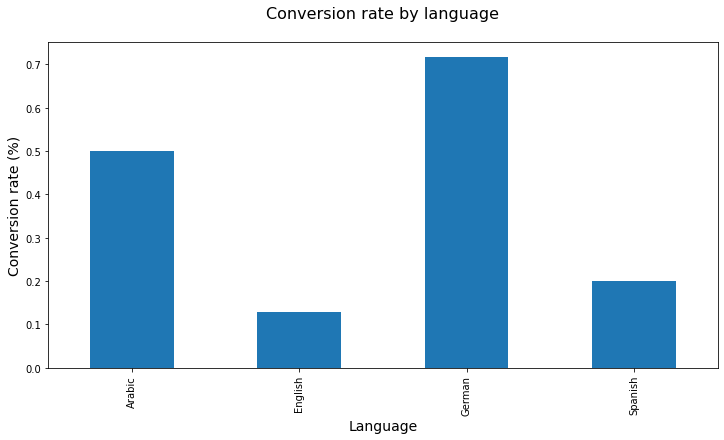

In [81]:
plt.figure(figsize=(12, 6))

# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

In [86]:
# Group by date_served and count unique users
total = marketing.groupby(by = ['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(by = ['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total


In [89]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_subscribed', 
                              'conversion_rate']

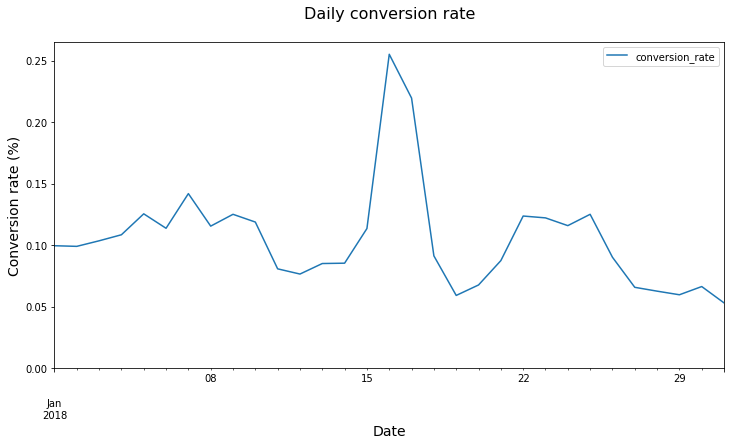

In [119]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_subscribed', 'conversion_rate', figsize=(12,6))

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118  


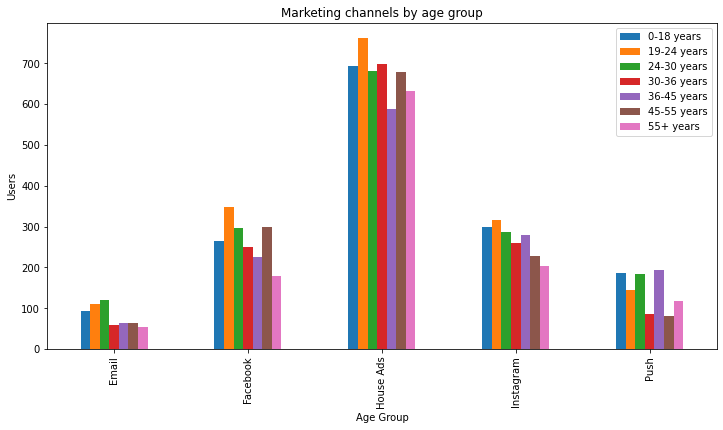

In [118]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

#print(channel_age)

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
print(channel_age_df.head())

# Plot channel_age
channel_age_df.plot(kind = 'bar',figsize=(12,6))
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
           
plt.show()

In [107]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head(15))

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
2018-01-02       Email                   4
                 Facebook                6
                 House Ads              17
                 Instagram               8
                 Push                    2
2018-01-03       Email                   1
                 Facebook                5
                 House Ads              17
                 Instagram              11
                 Push                    3
Name: user_id, dtype: int64


In [109]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head(15))

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
2018-01-02       Email                   3
                 Facebook                6
                 House Ads              10
                 Instagram               5
                 Push                    2
2018-01-03       Facebook                4
                 House Ads              11
                 Instagram              10
                 Push                    2
2018-01-04       Email                   1
Name: user_id, dtype: int64


<Figure size 864x432 with 0 Axes>

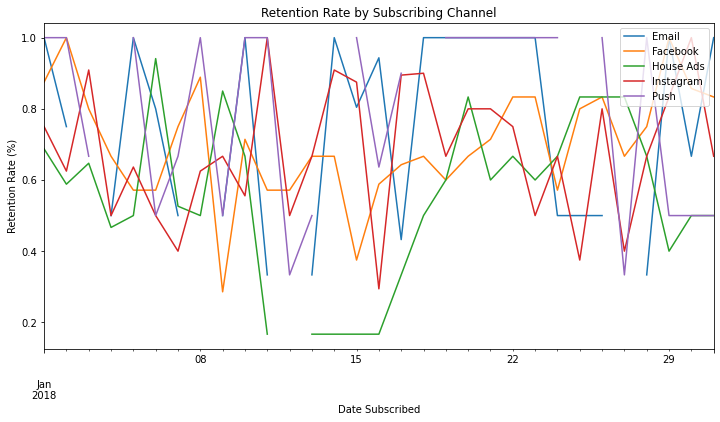

In [117]:
# Divide retained subscribers by total subscribers
from numpy import size


retention_rate = retention_subs/retention_total

retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

plt.figure(figsize=(12, 6))

# Plot retention rate
retention_rate_df.plot(figsize=(12,6))


# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = "upper right", labels=retention_rate_df.columns.values)
plt.show()

### Building Functions to simplify

We can build a function to enable us to calculate conversion rate across any sub-segment we want on the fly.

In [121]:
# This function would take dataframe and column names as input 
# the column names entered would be used to group by the dataframe and then
# it outputs the conversion rate


def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate


date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


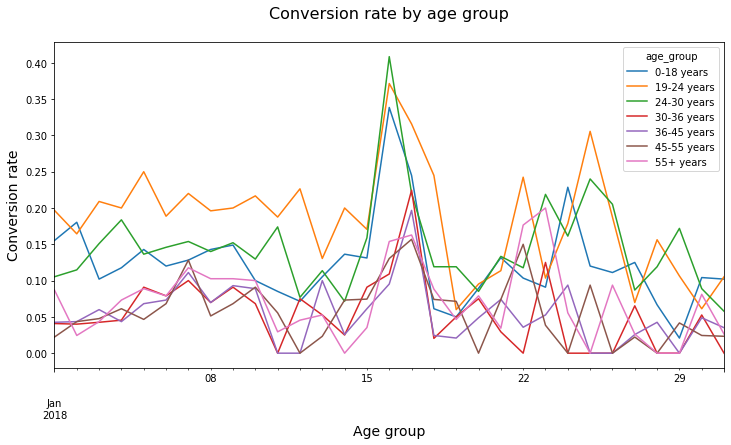

In [123]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

age_group_df.head()

# Visualize conversion by age_group
age_group_df.plot(figsize = (12,6))
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [131]:
# we are making a function to plot the results of the conversion rate function which
# was defined above

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.figure(figsize=(12, 6))

        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        

        # Show plot
        plt.show()  
        plt.clf()
        

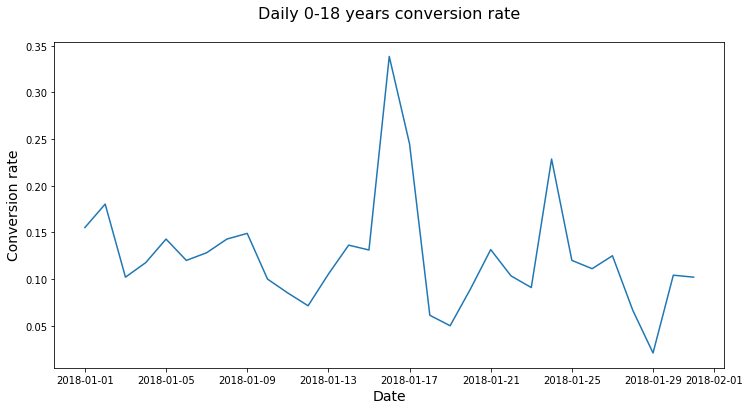

<Figure size 432x288 with 0 Axes>

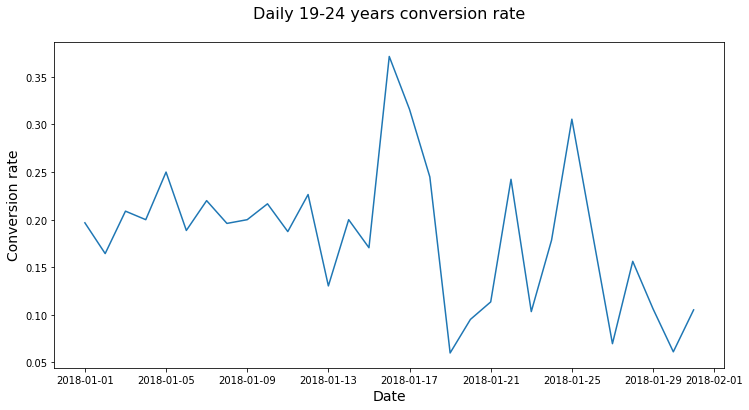

<Figure size 432x288 with 0 Axes>

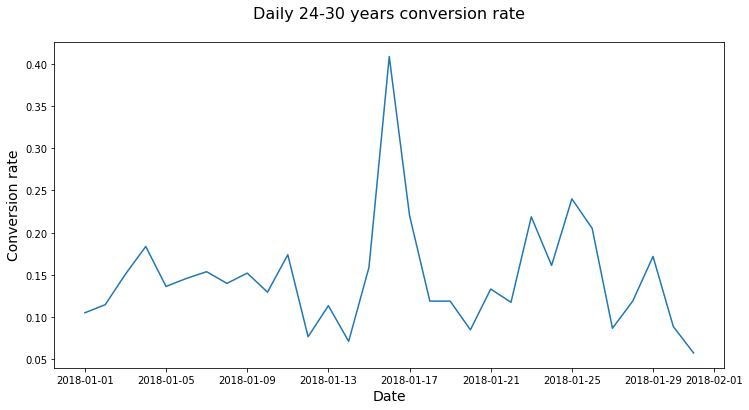

<Figure size 432x288 with 0 Axes>

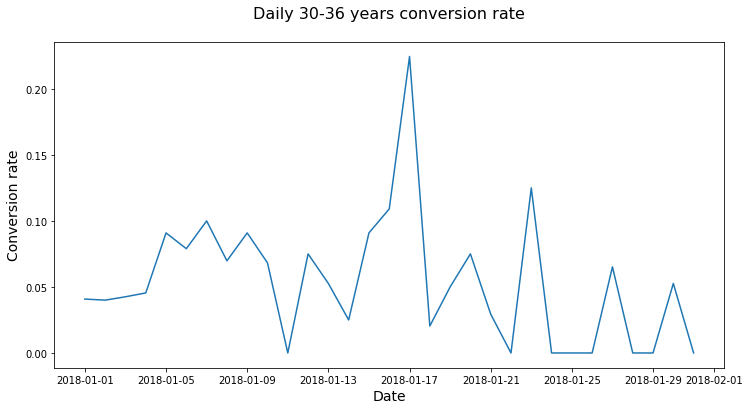

<Figure size 432x288 with 0 Axes>

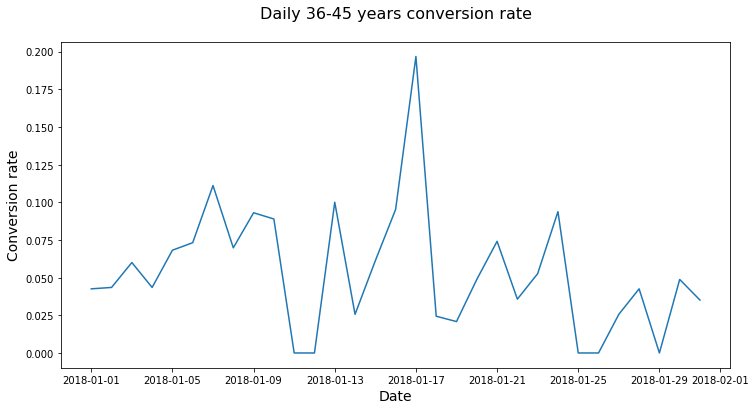

<Figure size 432x288 with 0 Axes>

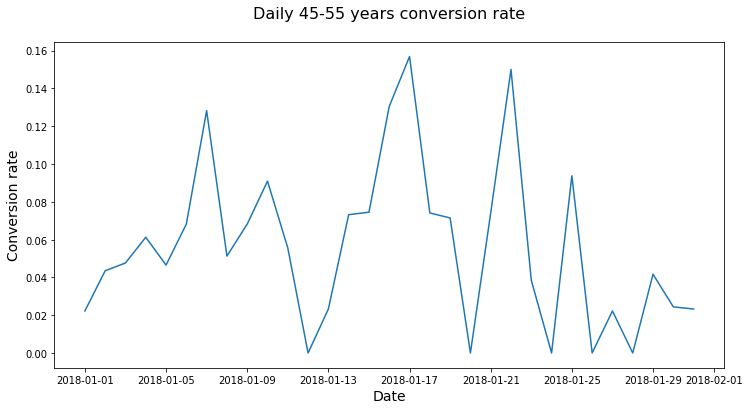

<Figure size 432x288 with 0 Axes>

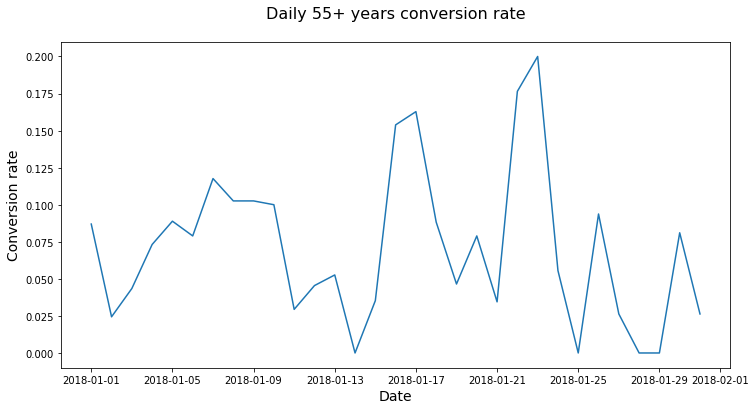

<Figure size 432x288 with 0 Axes>

In [132]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

#### Conversion rate plots by marketing channels

In [133]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


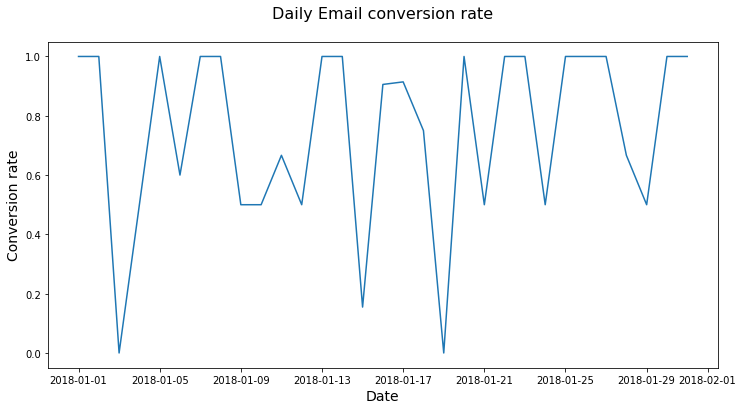

<Figure size 432x288 with 0 Axes>

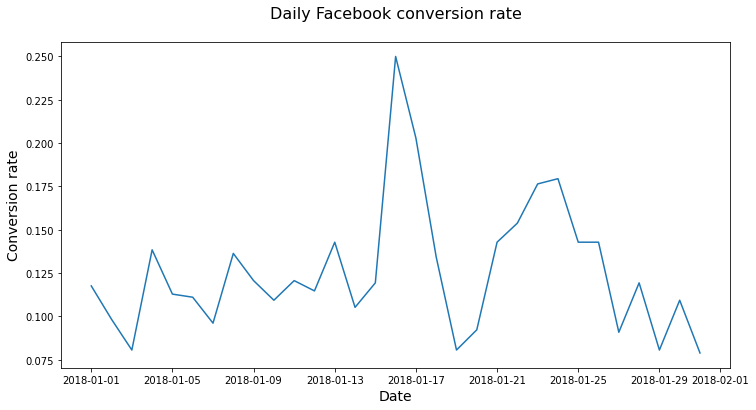

<Figure size 432x288 with 0 Axes>

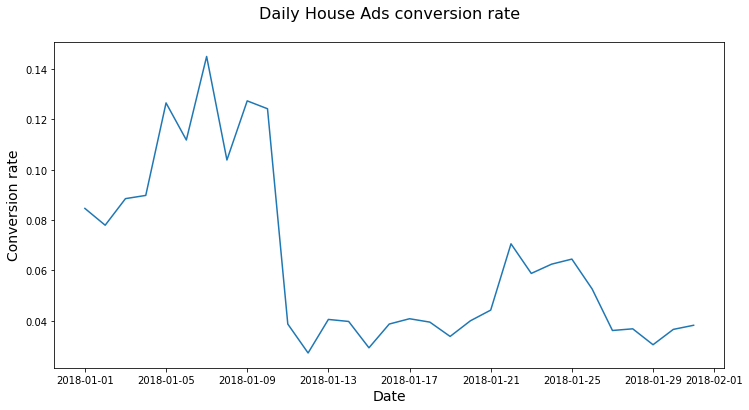

<Figure size 432x288 with 0 Axes>

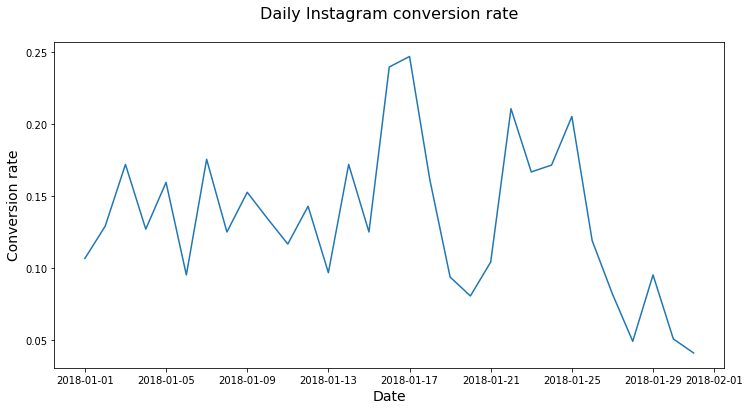

<Figure size 432x288 with 0 Axes>

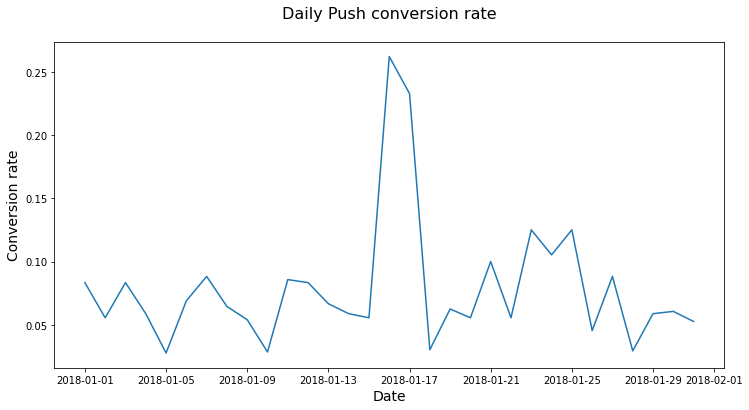

<Figure size 432x288 with 0 Axes>

In [134]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

On house ads conversion rate graph, we can see a sudden decrease in conversion rate near 10th and 11th January.

### Analyzing House ads conversion rate

<Figure size 864x432 with 0 Axes>

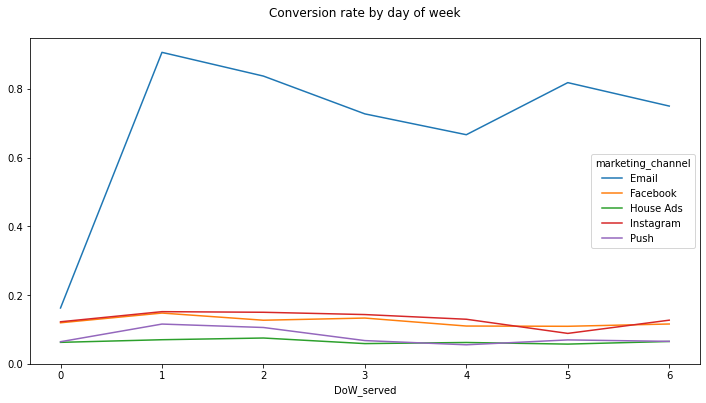

In [137]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing.date_served.dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served','marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
plt.figure(figsize=(12, 6))

DoW_df.plot(figsize=(12, 6))
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

from the graph, house ads appear stable across the week with a slight peak on Tuesday

### House ads conversion by language


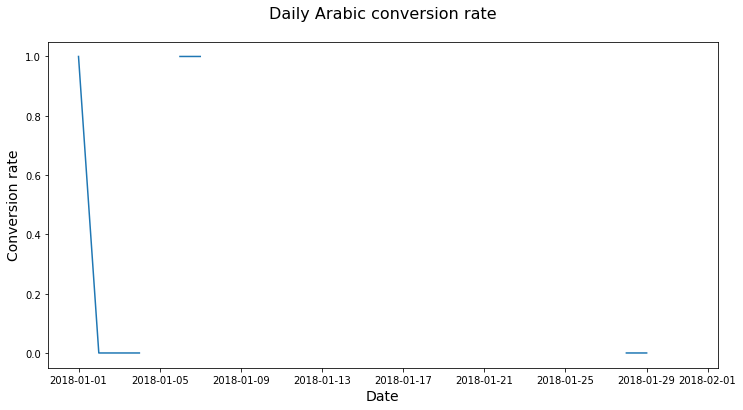

<Figure size 432x288 with 0 Axes>

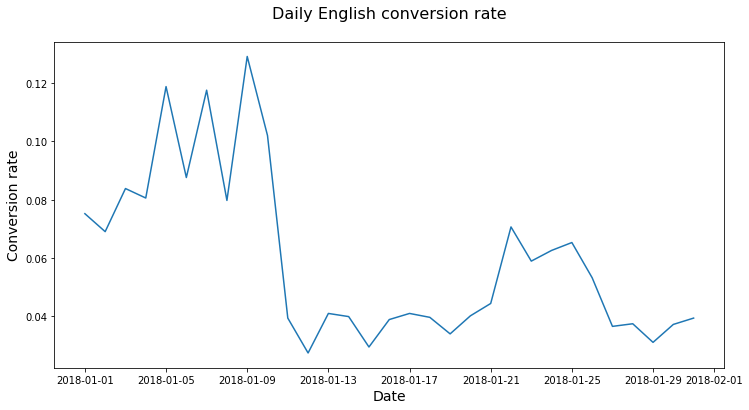

<Figure size 432x288 with 0 Axes>

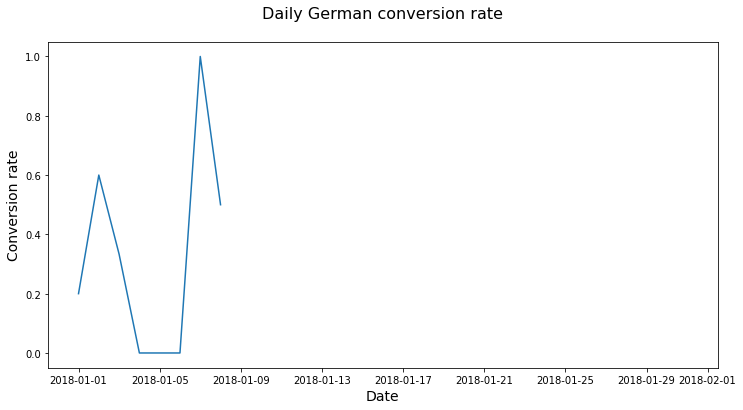

<Figure size 432x288 with 0 Axes>

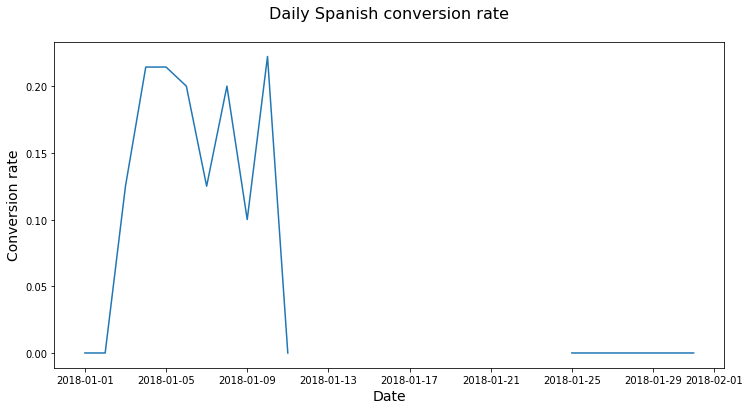

<Figure size 432x288 with 0 Axes>

In [138]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing["marketing_channel"]=="House Ads"]

house_ads.head()

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ["date_served", "language_displayed"])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

English conversion rate drops around the 10th and 11th, and there do not appear to be ads served in other languages for a two week period.

In [149]:
# Add the new column is_correct_lang which would check if the ads
# were displayed in the preferred language

house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(by = ["date_served", "is_correct_lang"])['user_id'].count()

print(language_check.head())
print("----------------")

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

date_served  is_correct_lang
2018-01-01   No                   2
             Yes                189
2018-01-02   No                   3
             Yes                247
2018-01-03   Yes                220
Name: user_id, dtype: int64
----------------
is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0

C:\Users\Rehan\AppData\Local\Temp\ipykernel_25752\2495420540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


<Figure size 864x432 with 0 Axes>

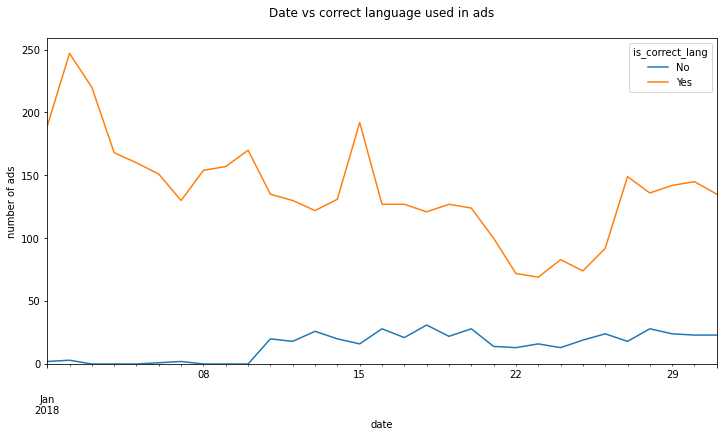

In [154]:
plt.figure(figsize=(12, 6))

language_check_df.plot(figsize=(12, 6))

plt.title('Date vs correct language used in ads\n')
plt.ylim(0)
plt.ylabel("number of ads")
plt.xlabel("date")
plt.show()



It can be seen above that the number of ads which were not in correct language increased from 11th

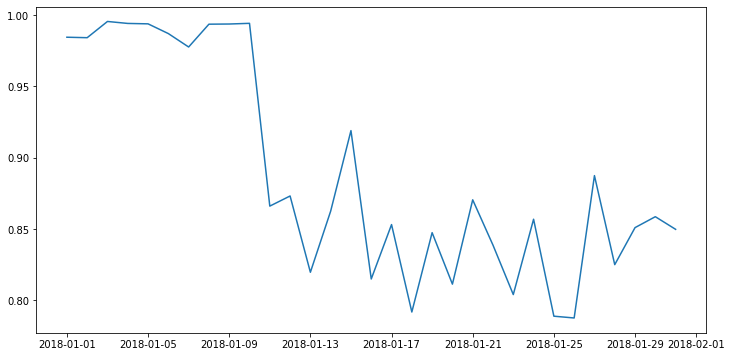

In [159]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.figure(figsize=(12, 6))

plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

It can be seen that house ads have been underperforming due to serving all ads in English.

In [160]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']

lang_conv = conversion_rate(house_ads_bug, "language_displayed")

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)


Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [179]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

converted = pd.DataFrame(converted.unstack(level=1))

converted.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [170]:
converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [182]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

print(converted.head())


                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01               0               NaN                   NaN   
2018-01-02               0               NaN                   NaN   
2018-01-03               

In [183]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


### A/B Testing

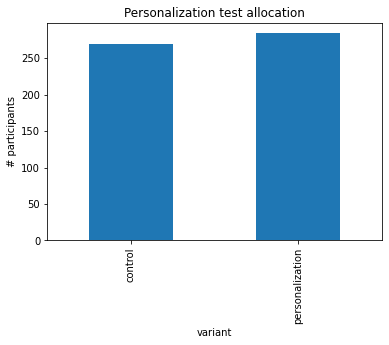

In [184]:
# Subset the DataFrame
email = marketing[marketing["marketing_channel"]=="Email"]

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()


# Plot a bar chart of the test allocation
alloc.plot(kind="bar")
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [185]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()

subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Lift can be defined as 

( Treatment conversion rate - Control conversion rate ) / Control conversion rate

In [186]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean) / a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [187]:
from scipy.stats import ttest_ind

In [189]:
ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)

This shows that the results are statisticlly significant with p = 0.0064

In [199]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [200]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [195]:
marketing.age_group.value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [201]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


